## Forced SIR model using R and simecol

In [1]:
library(deSolve)
library(simecol)
library(reshape2)

In [2]:
sirforcedode <- new("odeModel",
  main = function(time, init, parms, ...){
    with(as.list(c(init,parms)),{
      # ODEs
      N <- S+I+R
      dS <- mu*N-beta(beta0,beta1,omega,time)*S*I/N-mu*S
      dI <- beta(beta0,beta1,omega,time)*S*I/N-gamma*I-mu*I
      dR <- gamma*I-mu*R
      list(c(dS,dI,dR))
    })},
  equations = list(
    beta = function(beta0,beta1,omega,time){beta0*(1+beta1*sin(omega*time))}
  ),
  parms = c(beta0=10./7,beta1=0.05,omega=2*pi/365,gamma=1./7,mu=1./(70*365)),
  times = c(from=0,to=100*365,by=1),
  init = c(S=99999,I=1,R=0),
  solver = "lsoda"
)

In [3]:
# Simulate until equilibrium
sirforcedode <- sim(sirforcedode)
# Reset initial values
init(sirforcedode) <- unlist(out(sirforcedode)[100*365,2:4])
# Look at 10 years
times(sirforcedode) <- c(from=0,to=10*365,by=1)
# Simulate
sirforcedode <- sim(sirforcedode)

In [4]:
sirforced_out <- out(sirforcedode)
sirforced_out_long <- melt(sirforced_out,"time")

### Visualisation

In [5]:
library(ggplot2)

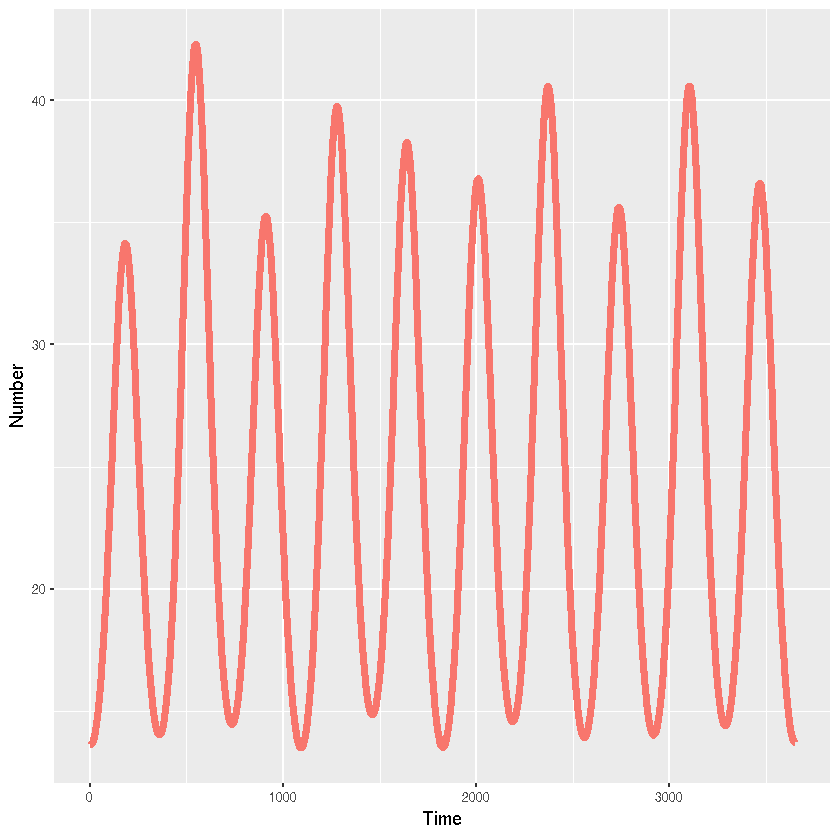

In [6]:
ggplot(sirforced_out_long[sirforced_out_long$variable=="I",],aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")+
  theme(legend.position="none")